In [2]:
#importing data after clean up in OpenRefine
#removed entires with missing important values such as budget, revenue, title etc. 
#removed movies released before 1990
#removed all movies that don't include english language 
# minor fixes regarding foregin laguage sings and encoding
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.patches as mpatches

data = pd.read_csv('movies-refined-X.csv')
data.shape
display(data)

,imdb_title_id,title,year,genre,duration,country,language,director,production_company,budget,usa_gross_income,worlwide_gross_income
0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,Konrad Pictures,48000000,47121859,76019048
1,tt0098375,Spontaneous Combustion,1990,"Horror, Sci-Fi, Thriller",97,USA,English,Tobe Hooper,Black Owl Productions,5500000,50367,50367
2,tt0098987,The Adventures of Ford Fairlane,1990,"Action, Adventure, Comedy",104,USA,English,Renny Harlin,Twentieth Century Fox,20000000,21413502,21413502
3,tt0099005,Air America,1990,"Action, Comedy, War",113,USA,"English, Lao",Roger Spottiswoode,Carolco Pictures,35000000,31053601,33461269
4,tt0099012,Alice,1990,"Comedy, Romance",106,USA,"English, Cantonese",Woody Allen,Jack Rollins & Charles H. Joffe Productions,12000000,7331647,7331647
...,...,...,...,...,...,...,...,...,...,...,...,...
5388,tt8663516,Child's Play,2019,Horror,90,"France, Canada, USA","English, Vietnamese",Lars Klevberg,Orion Pictures,10000000,29208403,44902237
5389,tt8772262,Midsommar,2019,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary","English, Swedish",Ari Aster,Proton Cinema,10000000,27426361,41123770
5390,tt9024106,Unplanned,2019,"Biography, Drama",109,USA,English,"Chuck Konzelman, Cary Solomon",Unplanned Movie,6000000,19005109,19320481
5391,tt9134216,Playing with Fire,2019,"Comedy, Family",96,USA,English,Andy Fickman,Broken Road Productions,29900000,18847824,21788746


In [3]:
income = data.worlwide_gross_income

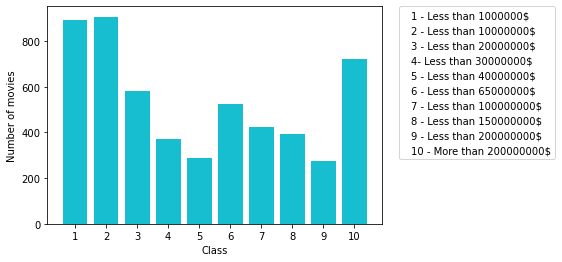

In [4]:
#visualizing movie distribution by revenue
classes = [0]*10
for inc in income:
    if inc <= 1000000:
        classes[0]+=1
    elif inc <= 10000000:
        classes[1]+=1
    elif inc <= 20000000:
        classes[2]+=1
    elif inc <= 30000000:
        classes[3]+=1
    elif inc <= 40000000:
        classes[4]+=1
    elif inc <= 65000000:
        classes[5]+=1
    elif inc <= 100000000:
        classes[6]+=1
    elif inc <= 150000000:
        classes[7]+=1
    elif inc <= 200000000:
        classes[8]+=1
    else:
        classes[9]+=1
        
        pt.bar(np.arange(10), classes)
        
pt.xticks(np.arange(10), np.arange(1,11))
pt.xlabel('Class')
pt.ylabel('Number of movies')
pt.rcParams['legend.handlelength'] = 0
pt.legend(('1 - Less than 1000000$','2 - Less than 10000000$','3 - Less than 20000000$','4- Less than 30000000$',
           '5 - Less than 40000000$','6 - Less than 65000000$','7 - Less than 100000000$',
           '8 - Less than 150000000$','9 - Less than 200000000$','10 - More than 200000000$'),
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pt.show()

In [5]:
#Adding GDP and GDP growth data to dataframe
    
con =  [
        (data['year'] == 1990),
        (data['year'] == 1991),
        (data['year'] == 1992),
        (data['year'] == 1993),
        (data['year'] == 1994),
        (data['year'] == 1995),
        (data['year'] == 1996),
        (data['year'] == 1997),
        (data['year'] == 1998),
        (data['year'] == 1999),
        (data['year'] == 2000),
        (data['year'] == 2001),
        (data['year'] == 2002),
        (data['year'] == 2003),
        (data['year'] == 2004),
        (data['year'] == 2005),
        (data['year'] == 2006),
        (data['year'] == 2007),
        (data['year'] == 2008),
        (data['year'] == 2009),
        (data['year'] == 2010),
        (data['year'] == 2011),
        (data['year'] == 2012),
        (data['year'] == 2013),
        (data['year'] == 2014),
        (data['year'] == 2015),
        (data['year'] == 2016),
        (data['year'] == 2017),
        (data['year'] == 2018),
        (data['year'] == 2019)]


GDP1 =[9.366,9.355,9.685,9.952,10.352,10.63,11.031,11.522,12.038,12.611,13.131,13.262,13.493,13.879,14.406,
            14.913,15.338,15.626,15.605,15.209,15.599,15.841,16.197,16.495,16.912,17.404,17.689,18.108,18.638,19.073]
GDP2 = [1.9,-0.1,3.5,2.8,4.0,2.7,3.8,4.4,4.5,4.8,4.1,1.0,1.7,2.9,3.8,3.5,2.9,1.9,-0.1,-2.5,2.6,1.6,2.2,1.8,2.5,2.9,1.6,2.4,2.9,2.3]

                  
data['Real GDP (trillions $)'] =np.select(con,GDP1)
data['GDP Growth Rate %'] =np.select(con,GDP2)
data.head()

,imdb_title_id,title,year,genre,duration,country,language,director,production_company,budget,usa_gross_income,worlwide_gross_income,Real GDP (trillions $),GDP Growth Rate %
0,tt0035423,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,Konrad Pictures,48000000,47121859,76019048,13.262,1.0
1,tt0098375,Spontaneous Combustion,1990,"Horror, Sci-Fi, Thriller",97,USA,English,Tobe Hooper,Black Owl Productions,5500000,50367,50367,9.366,1.9
2,tt0098987,The Adventures of Ford Fairlane,1990,"Action, Adventure, Comedy",104,USA,English,Renny Harlin,Twentieth Century Fox,20000000,21413502,21413502,9.366,1.9
3,tt0099005,Air America,1990,"Action, Comedy, War",113,USA,"English, Lao",Roger Spottiswoode,Carolco Pictures,35000000,31053601,33461269,9.366,1.9
4,tt0099012,Alice,1990,"Comedy, Romance",106,USA,"English, Cantonese",Woody Allen,Jack Rollins & Charles H. Joffe Productions,12000000,7331647,7331647,9.366,1.9


In [ ]:
data.to_csv('movies-ref-GDP.csv')

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.patches as mpatches

#data = pd.read_csv('movies-ref-GDP.csv')
data = pd.read_csv('movies-ref-GDP-csv.csv')
data.shape

In [ ]:
#Splitting genre object, turning it to binary through get_dummies and concat with the oryginal dataframe

binary=data.genre.str.get_dummies(sep=', ')
data = pd.concat([data, binary], axis = 1)
display(binary)
display(data)

In [ ]:
data.drop(['Column','imdb_title_id','genre'], axis=1)

In [ ]:
data.to_csv('movies-checkpoint_genre_clean.csv')

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.patches as mpatches

data = pd.read_csv('movies-checkpoint_genre_clean.csv')
data.shape
display(data)

In [ ]:
#Getting worldwide income sum for unique production companies
pc = data.groupby('production_company', group_keys=False).apply(lambda x: x.loc[x.worlwide_gross_income.idxmax()]).reset_index(drop=True)
pc.drop(pc.columns.difference(['production_company','worlwide_gross_income']), 1, inplace=True)
pc.rename(columns={'worlwide_gross_income':'Sum_production_company_income'}, inplace=True)
display(pc)

In [ ]:
#Merging oryginal dataframe with unique values (Sum of production company income)
data = pd.merge(data, pc, on=['production_company'])
display(data)

In [ ]:
#Getting worldwide income sum for unique Director
dr = data.groupby('director', group_keys=False).apply(lambda x: x.loc[x.worlwide_gross_income.idxmax()]).reset_index(drop=True)
dr.drop(dr.columns.difference(['director','worlwide_gross_income']), 1, inplace=True)
dr.rename(columns={'worlwide_gross_income':'Sum_Director_income'}, inplace=True)
display(dr)

In [ ]:
#Merging oryginal dataframe with unique values (Sum of Director income)
data = pd.merge(data, dr, on=['director'])
display(data)

In [ ]:
#Adding movie count of a Director as Director_movies
dir_movie = data.groupby(['director']).size().reset_index(name='Director_movies')
display(dir_movie)
data = pd.merge(data, dir_movie, on=['director'])
display(data)

In [ ]:
#cleaning up the dataframe
data.rename(columns={'worlwide_gross_income':'worldwide_gross_income'}, inplace=True)
data=data.drop(['Unnamed: 0','Column','imdb_title_id','genre','title','country','language','production_company','director'], axis=1)

In [ ]:
data.to_csv('movies-checkpoint_clean.csv')

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.patches as mpatches

data = pd.read_csv('movies-checkpoint_clean.csv')
data.shape
display(data)

In [ ]:
#final clean up
data=data.drop(['Unnamed: 0'], axis=1)
data=data.astype(np.float64)
data.year = data.year.astype(int)
display(data)
data.dtypes

In [ ]:
#Adding classification column to determine the sucess of a movie
data['Classification'] = np.float64(0)
revenue = row['worldwide_gross_income']
budget = row['budget']

for i, row in data.iterrows():
        #sucess
        if   revenue > budget:
             data.at[i,'Classification'] = np.float64(1)
        #fail
             data.at[i,'Classification'] = np.float64(0)
        #fail
        else:
             data.at[i,'Classification'] = np.float64(0)
display(data)